This is my first seaborn notebook and I am trying to learn from these link -  
1. [Python Seaborn tutarial](https://elitedatascience.com/python-seaborn-tutorial)  
2. [Medium Seaborn beginner tutorial](https://medium.com/beeranddiapers/distribution-plotspermalink-f215d47d854e)   

They contain the explanation of what I have done here, but I have added a few article related to statistical concepts used in these plots.
I have skipped the comman plot from second tutorial

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np

In [3]:
df = pd.read_csv("Pokemon.csv", encoding="unicode_escape")
df = df.drop(["#"], axis = 1)

In [4]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       151 non-null    object
 1   Type 1     151 non-null    object
 2   Type 2     67 non-null     object
 3   Total      151 non-null    int64 
 4   HP         151 non-null    int64 
 5   Attack     151 non-null    int64 
 6   Defense    151 non-null    int64 
 7   Sp. Atk    151 non-null    int64 
 8   Sp. Def    151 non-null    int64 
 9   Speed      151 non-null    int64 
 10  Stage      151 non-null    int64 
 11  Legendary  151 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 13.2+ KB


In [6]:
df["Type 1"].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon'], dtype=object)

In [7]:
df["Type 2"].unique()

array(['Poison', nan, 'Flying', 'Ground', 'Fairy', 'Grass', 'Fighting',
       'Psychic', 'Steel', 'Ice', 'Rock', 'Water'], dtype=object)

## Scatter Plot

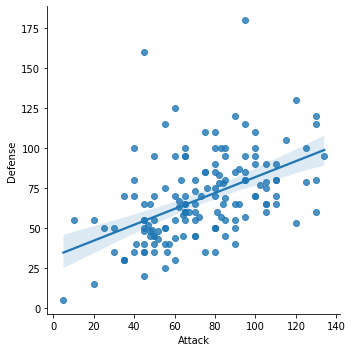

In [8]:
sns.lmplot("Attack", "Defense", data = df)

Scatter Plot (without diagonal)

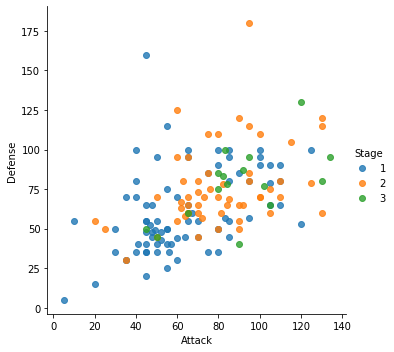

In [9]:
sns.lmplot("Attack", 
          "Defense", 
          data = df,
          fit_reg = False,
          hue = 'Stage')

(0, 190.44212186867063)

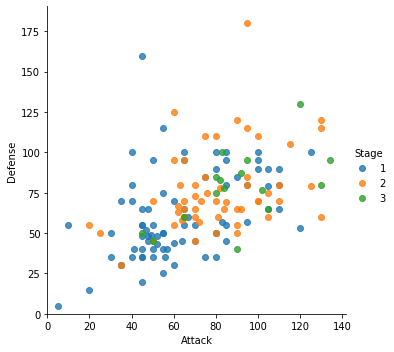

In [10]:
sns.lmplot("Attack", 
          "Defense", 
          data = df,
          fit_reg = False,
          hue = 'Stage')

#for extra function we need to use matplotlib

plt.xlim(0, None)
plt.ylim(0, None)

## BoxPlot

In order to understand Box plot, read in this order

1. [68-95-99.7 Rule](https://towardsdatascience.com/understanding-the-68-95-99-7-rule-for-a-normal-distribution-b7b7cbf760c2)  
2. [Gaussain Distribution](https://en.wikipedia.org/wiki/Normal_distribution)  
3. [BoxPlot](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51) 

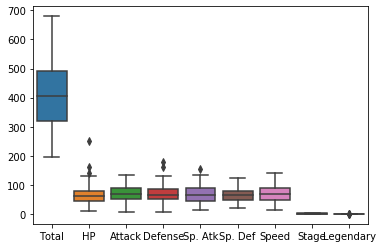

In [11]:
sns.boxplot(data = df)

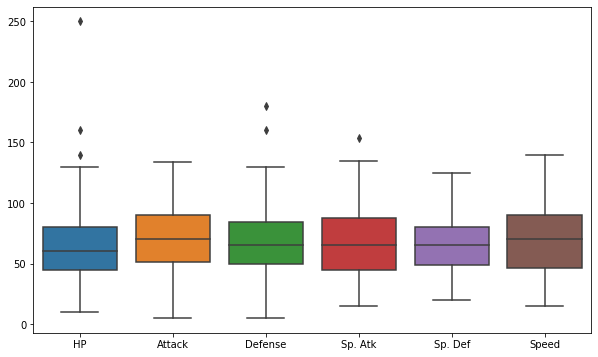

In [12]:
#dropping total, Stage and Legendary 
stats_df = df.drop(["Total", "Stage", "Legendary"], axis = 1)

plt.figure(figsize=(10, 6))
sns.boxplot(data = stats_df)

## Vilon Plot
[Kernel Density Function](https://mathisonian.github.io/kde/)  
[Vilon Plot](https://towardsdatascience.com/violin-plots-explained-fb1d115e023d)

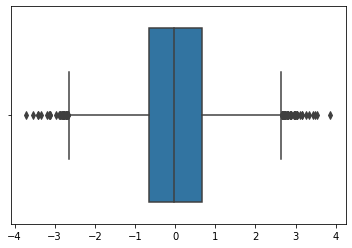

In [13]:
x = np.random.randn(10000)
sns.boxplot(x)


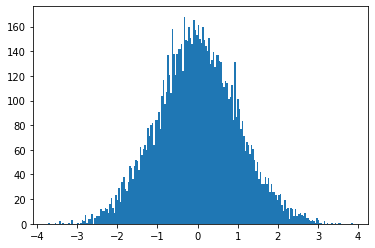

In [14]:
plt.hist(x, bins = 200);

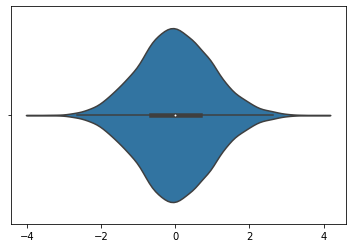

In [15]:
sns.violinplot(x)

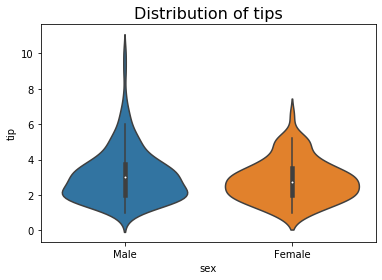

In [16]:
#sample plot

tips = sns.load_dataset("tips")
ax = sns.violinplot(x="sex", y="tip", data=tips)
ax.set_title('Distribution of tips', fontsize=16);

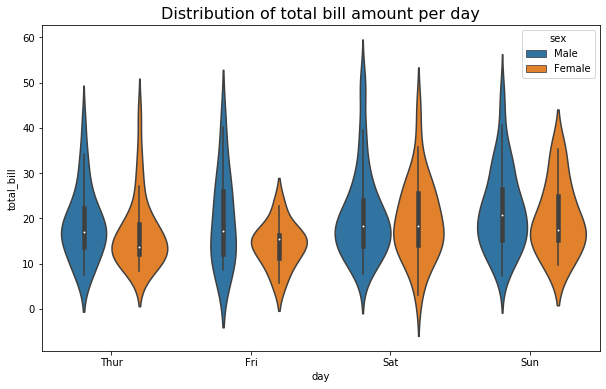

In [17]:
plt.figure(figsize = (10, 6))
ax = sns.violinplot(x="day", y="total_bill", hue="sex", data=tips)
ax.set_title('Distribution of total bill amount per day', fontsize=16);

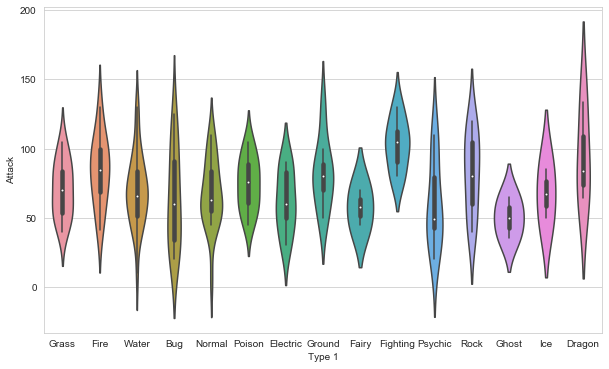

In [18]:
# Set theme
sns.set_style('whitegrid')
plt.figure (figsize = (10, 6))
# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df);

In [19]:
# Set the color palette

pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

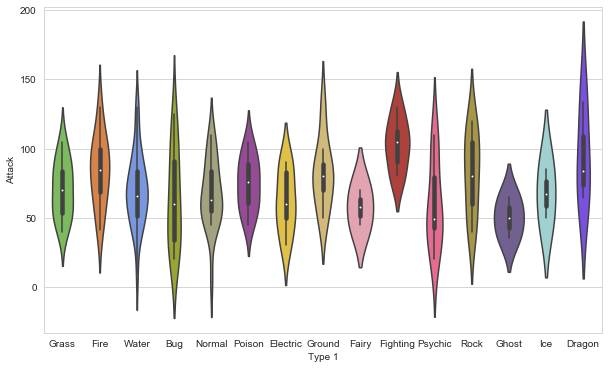

In [20]:
# Set theme
sns.set_style('whitegrid')
plt.figure (figsize = (10, 6))
# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors);

In [21]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Swarm Plots

[Swarm Plots](https://medium.com/@harrison.hardin/swarm-plots-with-overlaid-box-plots-18c35912c049)

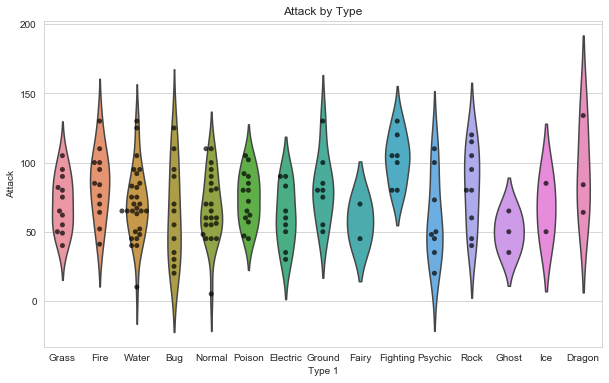

In [22]:
plt.figure(figsize=(10,6))
plt.title('Attack by Type')

sns.violinplot(x = 'Type 1', y = 'Attack', data = df, inner = None, palatte = pkmn_type_colors)

sns.swarmplot(x = 'Type 1', y = 'Attack', data = df, color="black", 
             alpha = 0.7); #make it transparent

In [23]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45
1,Ivysaur,Grass,Poison,60,62,63,80,80,60
2,Venusaur,Grass,Poison,80,82,83,100,100,80
3,Charmander,Fire,NaN,39,52,43,60,50,65
4,Charmeleon,Fire,NaN,58,64,58,80,65,80


## Melt
`melt` - it unpivots the data  
[Melt](https://www.geeksforgeeks.org/python-pandas-melt/)

In [24]:
melted_df = pd.melt(stats_df, 
                    ["Name", "Type 1", "Type 2"], 
                    var_name="Stat")
melted_df

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58
...,...,...,...,...,...
901,Dratini,Dragon,NaN,Speed,50
902,Dragonair,Dragon,NaN,Speed,70
903,Dragonite,Dragon,Flying,Speed,80
904,Mewtwo,Psychic,NaN,Speed,130


In [25]:
#shape of the normal vs melted
stats_df.shape, melted_df.shape

((151, 9), (906, 5))

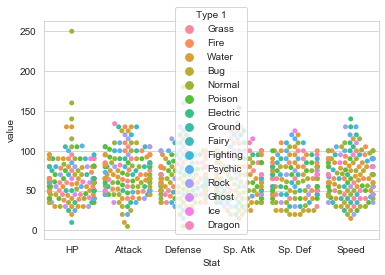

In [26]:
sns.swarmplot(x = 'Stat', y = 'value', data = melted_df, hue = 'Type 1');

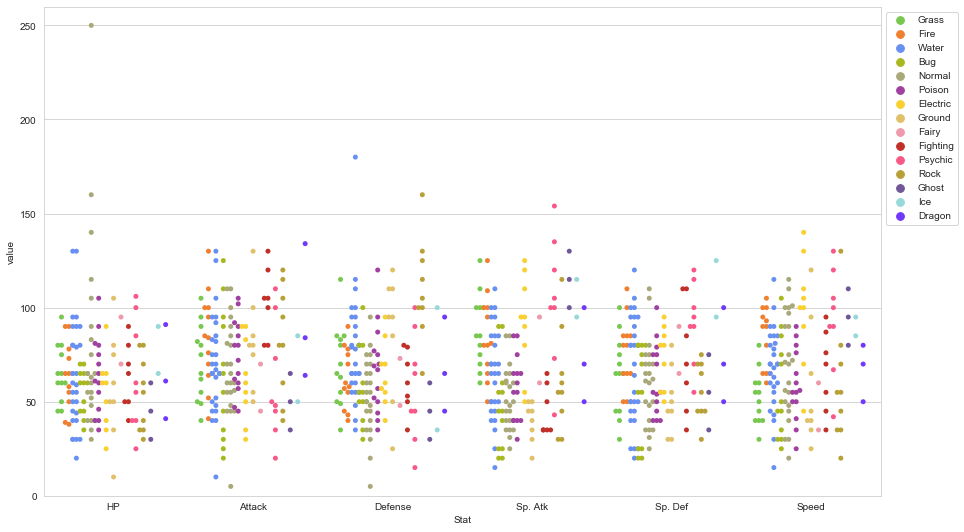

In [27]:
#improve the previous plot
plt.figure(figsize=(15, 9))

sns.swarmplot(x = 'Stat',
             y = 'value',
             data = melted_df,
             hue = "Type 1",
             dodge = True, #seperate points by hue
             palette = pkmn_type_colors)

plt.ylim(0, 260)
plt.legend(loc = 2, #shifts the legend in upper left corner
           bbox_to_anchor=(1, 1)) # Shifts the legend outside

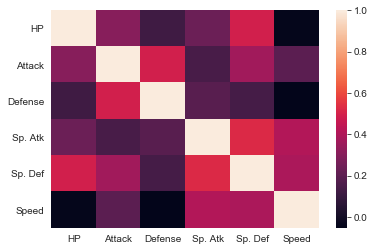

In [28]:
#calculate correlations
corr = stats_df.corr()

#create heatmap
sns.heatmap(corr);


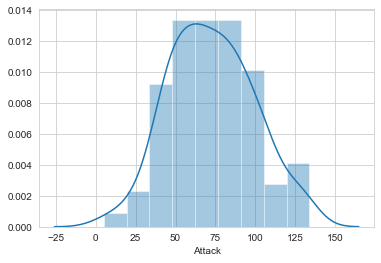

In [29]:
#Histogram

sns.distplot(df.Attack)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

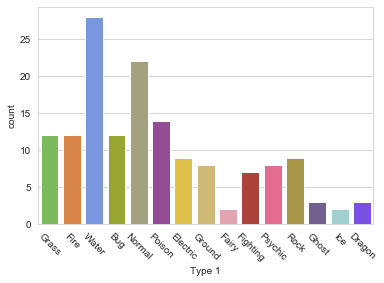

In [30]:
#bar plot
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

## Cat Plot

Creates seperate by Categorical classes

<Figure size 1728x432 with 0 Axes>

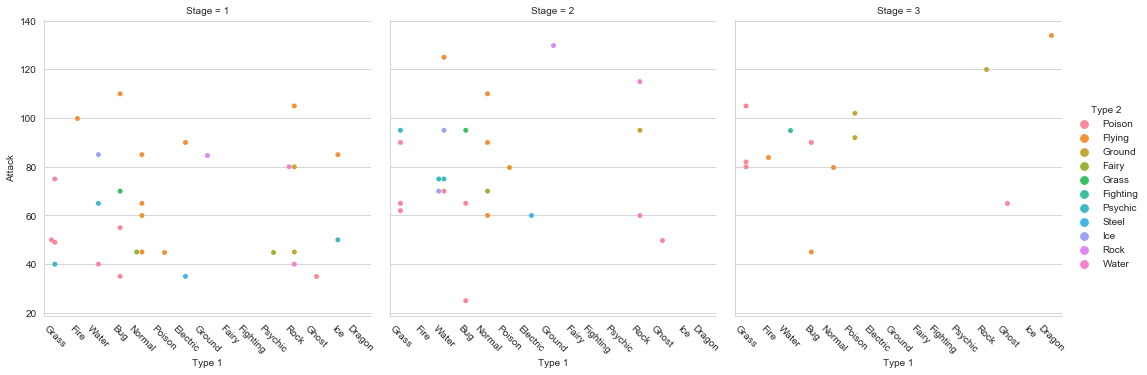

In [31]:
plt.figure(figsize=(24, 6))
g = sns.catplot(x = 'Type 1',
              y = 'Attack',
              data = df,
              col = 'Stage', #seperated by Stage
              kind = 'swarm', #type of graph in it
           hue = "Type 2"); #legend color

#rotate the axis
g.set_xticklabels(rotation = -45);

## Density Plot

(0, 140)

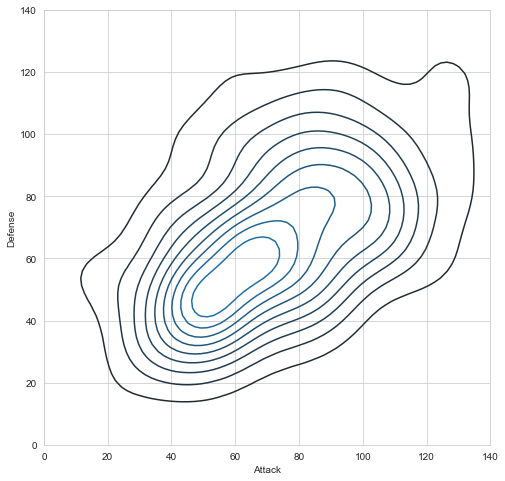

In [32]:
# Density Plot
plt.figure(figsize=(8, 8));

sns.kdeplot(df.Attack, df.Defense)

plt.xlim(0, 140)
plt.ylim(0, 140)

## Joint Distribution Plot

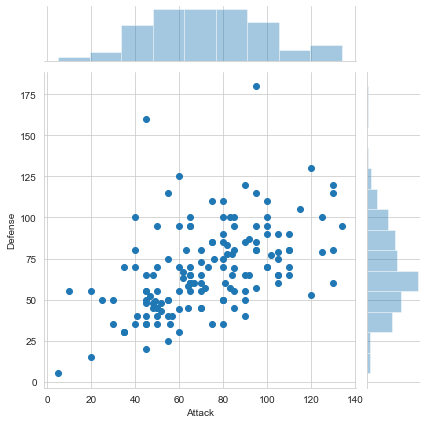

In [33]:
sns.jointplot(x='Attack', y='Defense', data=df)